In [10]:
# Import necessary libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet  # Updated Prophet import
import matplotlib.pyplot as plt

# 1. Data Loading and Preprocessing
# Load the CSV file
file_path = 'Dataset.csv'
df = pd.read_csv(file_path)

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Sort by Date and set the index as Date
df = df.sort_values(by='Date')
df.set_index('Date', inplace=True)

# Fill missing values with forward fill (or you can choose other methods)
df.fillna(method='ffill', inplace=True)




C:\Users\VENKATRAMAN.G\AppData\Local\Temp\ipykernel_13364\3825348533.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


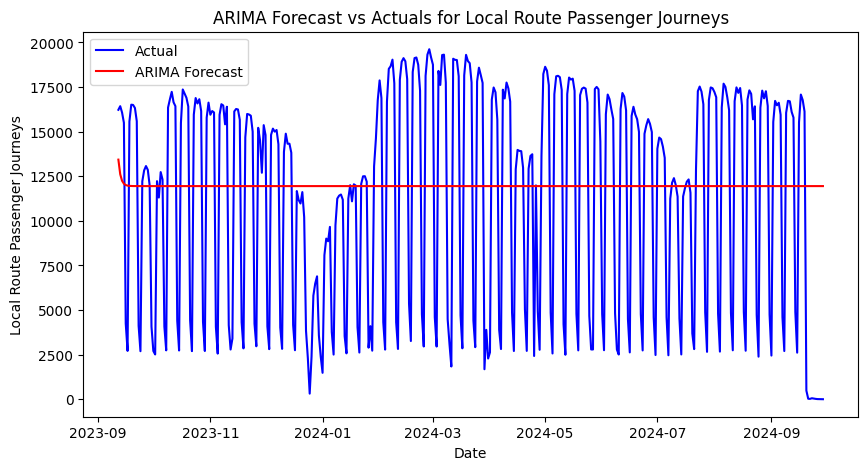

In [11]:
# 2. ARIMA Modeling and Forecasting
# We'll forecast on the 'Local Route' series

# Extract the 'Local Route' column
local_route_data = df['Local Route']

# Ensure the data has a daily frequency
local_route_data = local_route_data.asfreq('D')

# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(local_route_data) * 0.8)
train_data, test_data = local_route_data[:train_size], local_route_data[train_size:]

# Fit ARIMA model on training data (order can be tuned further)
arima_model = ARIMA(train_data, order=(1, 1, 1))
fitted_arima_model = arima_model.fit()

# Forecast for the test period
forecast_arima = fitted_arima_model.forecast(steps=len(test_data))

# Plot the actual vs forecasted values using ARIMA
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Actual', color='blue')
plt.plot(test_data.index, forecast_arima, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast vs Actuals for Local Route Passenger Journeys')
plt.xlabel('Date')
plt.ylabel('Local Route Passenger Journeys')
plt.legend()
plt.show()

11:17:13 - cmdstanpy - INFO - Chain [1] start processing
11:17:13 - cmdstanpy - INFO - Chain [1] done processing


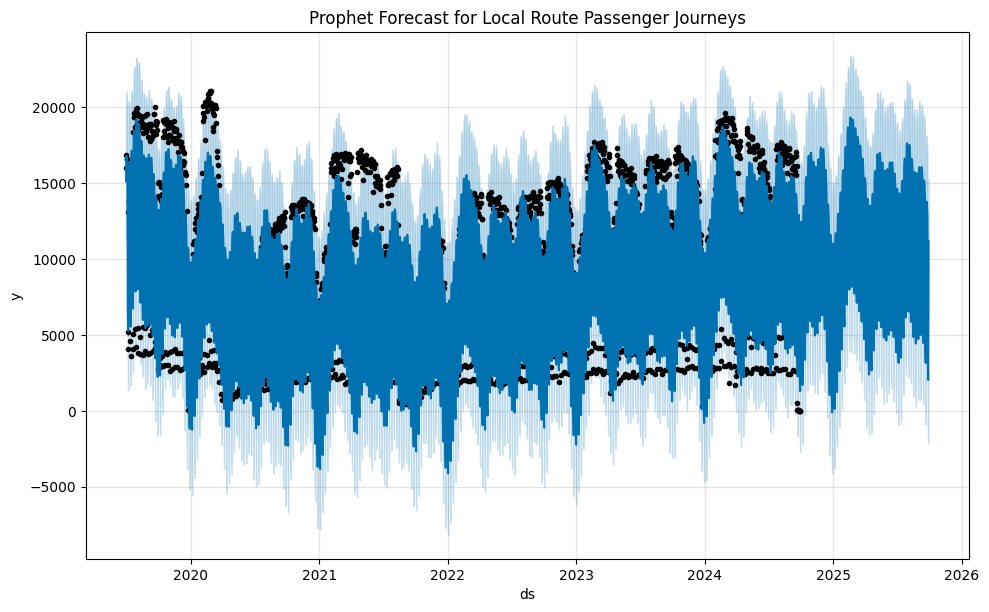

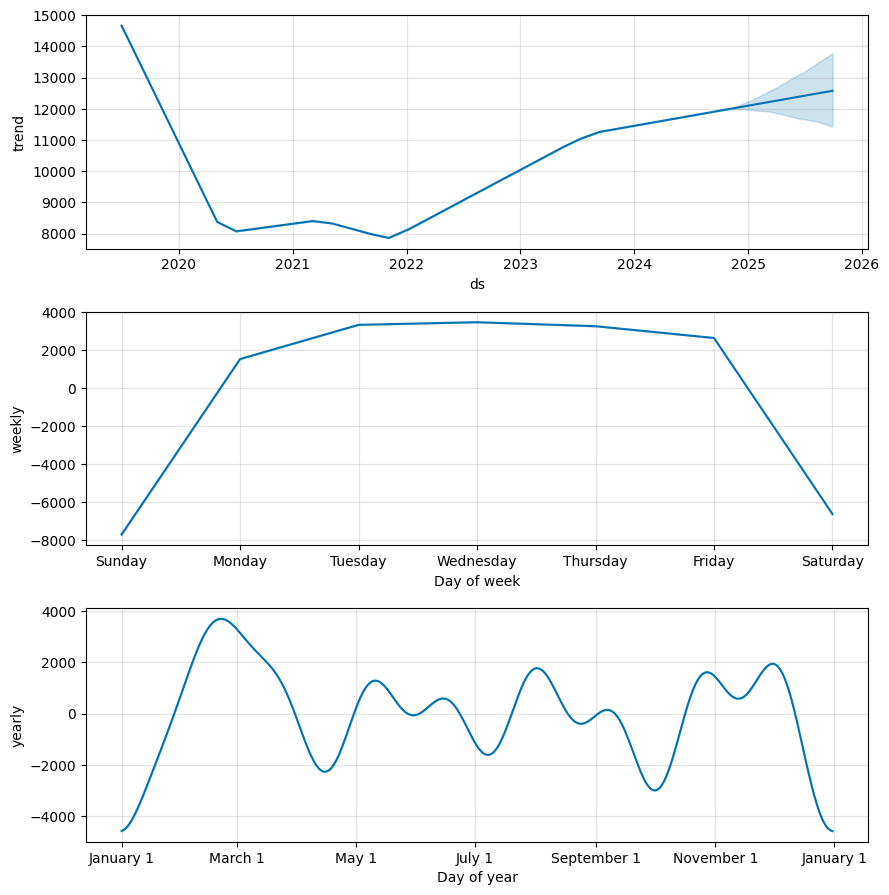

In [12]:
# 3. Prophet Modeling and Forecasting
# Prepare data for Prophet model
prophet_data = df.reset_index()[['Date', 'Local Route']].rename(columns={'Date': 'ds', 'Local Route': 'y'})

# Initialize Prophet model
prophet_model = Prophet()

# Fit the model
prophet_model.fit(prophet_data)

# Create a dataframe with future dates for forecasting
future_dates = prophet_model.make_future_dataframe(periods=365)  # Forecast for 365 days into the future

# Generate forecast
forecast_prophet = prophet_model.predict(future_dates)

# Plot the forecast
prophet_model.plot(forecast_prophet)
plt.title('Prophet Forecast for Local Route Passenger Journeys')
plt.show()

# Plot forecast components (trend, seasonality, etc.)
prophet_model.plot_components(forecast_prophet)
plt.show()

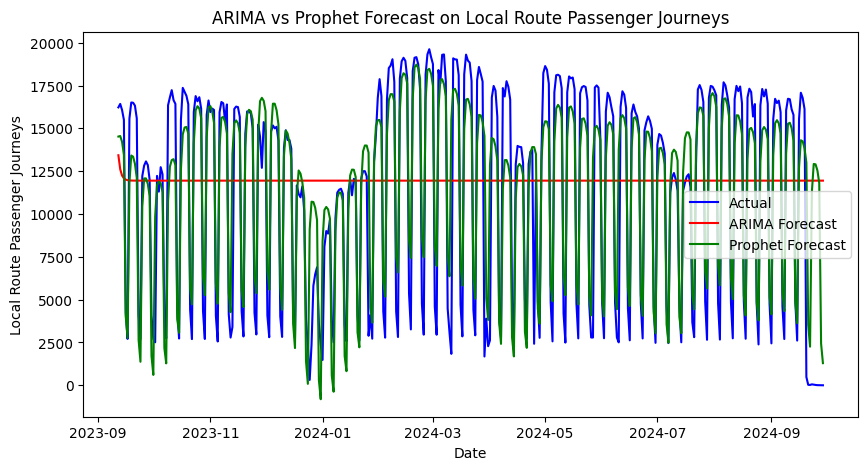

In [13]:
# 4. Forecast Comparison: ARIMA vs Prophet
# Comparing ARIMA and Prophet on the test set
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Actual', color='blue')
plt.plot(test_data.index, forecast_arima, label='ARIMA Forecast', color='red')
plt.plot(test_data.index, forecast_prophet.set_index('ds')['yhat'].loc[test_data.index], label='Prophet Forecast', color='green')
plt.title('ARIMA vs Prophet Forecast on Local Route Passenger Journeys')
plt.xlabel('Date')
plt.ylabel('Local Route Passenger Journeys')
plt.legend()
plt.show()


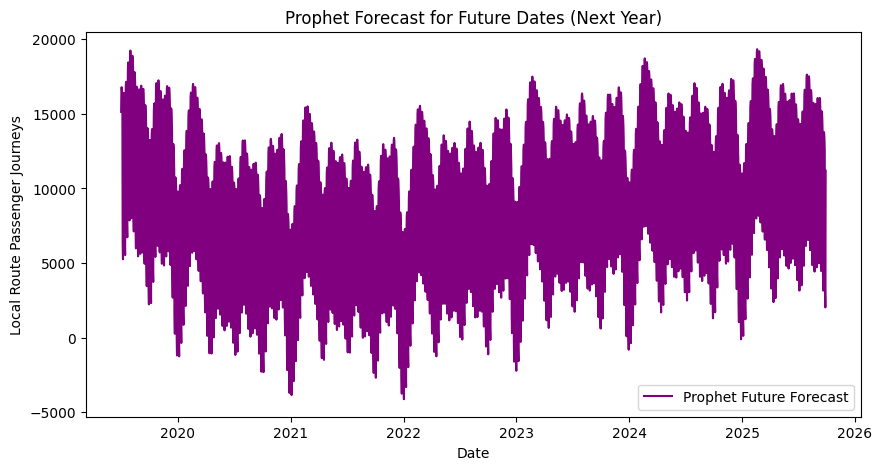

In [14]:
# 5. Future Forecasting using Prophet
# Visualize the forecast for future dates
plt.figure(figsize=(10, 5))
plt.plot(future_dates['ds'], forecast_prophet['yhat'], label='Prophet Future Forecast', color='purple')
plt.title('Prophet Forecast for Future Dates (Next Year)')
plt.xlabel('Date')
plt.ylabel('Local Route Passenger Journeys')
plt.legend()
plt.show()

11:17:15 - cmdstanpy - INFO - Chain [1] start processing
11:17:15 - cmdstanpy - INFO - Chain [1] done processing


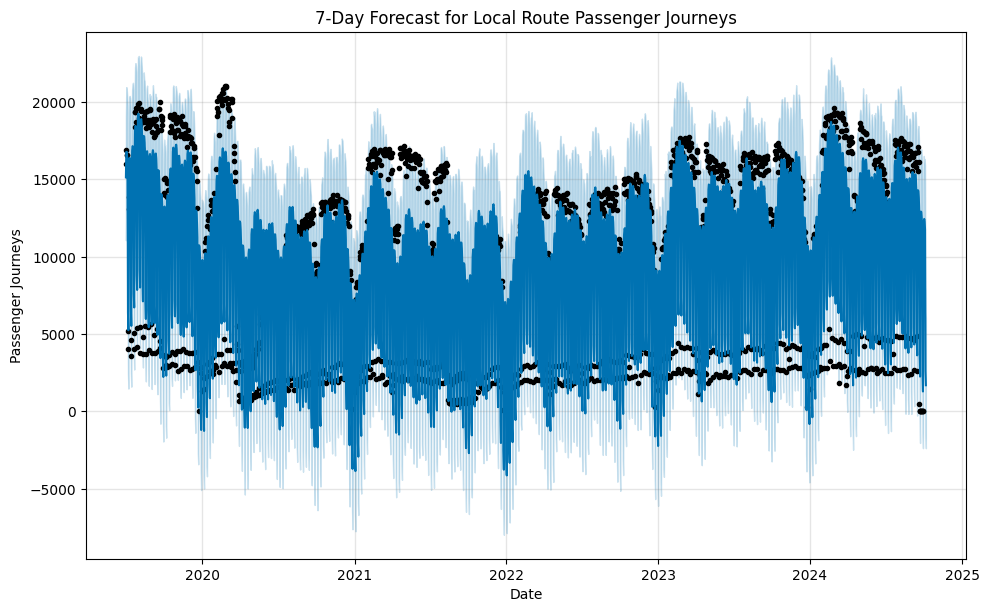

           Date  Predicted Passenger Journeys  Lower Bound   Upper Bound
1918 2024-09-30                  10492.956395  6355.231266  14590.082780
1919 2024-10-01                  12287.663444  8207.632888  16522.238604
1920 2024-10-02                  12451.621378  8314.098080  16019.373278
1921 2024-10-03                  12300.761508  8284.676752  16324.797535
1922 2024-10-04                  11770.873746  7871.599265  15910.210302
1923 2024-10-05                   2622.480372 -1528.166822   6401.620213
1924 2024-10-06                   1697.070315 -2375.778258   6067.109379


In [15]:
# Forcast Update for Next 7 Days
prophet_data = df.reset_index()[['Date', 'Local Route']].rename(columns={'Date': 'ds', 'Local Route': 'y'})

# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_data)

# 3. Forecast for the next 7 days
future_dates = prophet_model.make_future_dataframe(periods=7)  # Forecast for 7 days into the future
forecast_prophet = prophet_model.predict(future_dates)

# 4. Plot the forecast
prophet_model.plot(forecast_prophet)
plt.title('7-Day Forecast for Local Route Passenger Journeys')
plt.xlabel('Date')
plt.ylabel('Passenger Journeys')
plt.show()

# 5. Display forecasted data for the next 7 days
forecast_next_7_days = forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

# Rename columns for better understanding in the output
forecast_next_7_days.columns = ['Date', 'Predicted Passenger Journeys', 'Lower Bound', 'Upper Bound']

# Print the forecast data for the next 7 days
print(forecast_next_7_days)
